* PATHL=/home/asif/Code/Godhuli/superstore_sales_analysis/Data/superstore.csv
* PATHW=/superstore_sales_analysis/Data/superstore.csv
* Dataset link = https://www.kaggle.com/datasets/zafarali27/car-price-prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('./Data/car_price_prediction_.csv')

In [3]:
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


<Axes: >

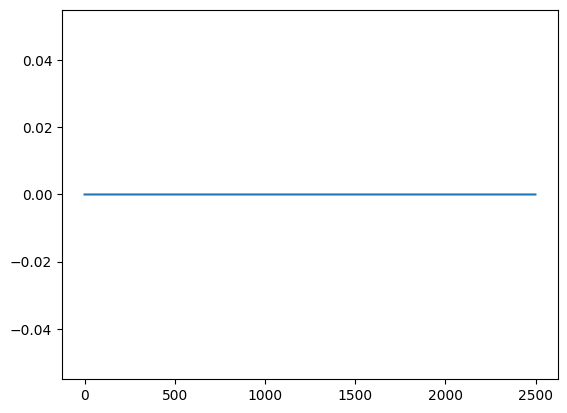

In [5]:
df.isnull().sum(axis=1).plot()

In [6]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [7]:
# Checking for Duplicates
if df.duplicated().sum() > 0:
    print("Duplicate exits")
else:
    print("No duplicates")

No duplicates


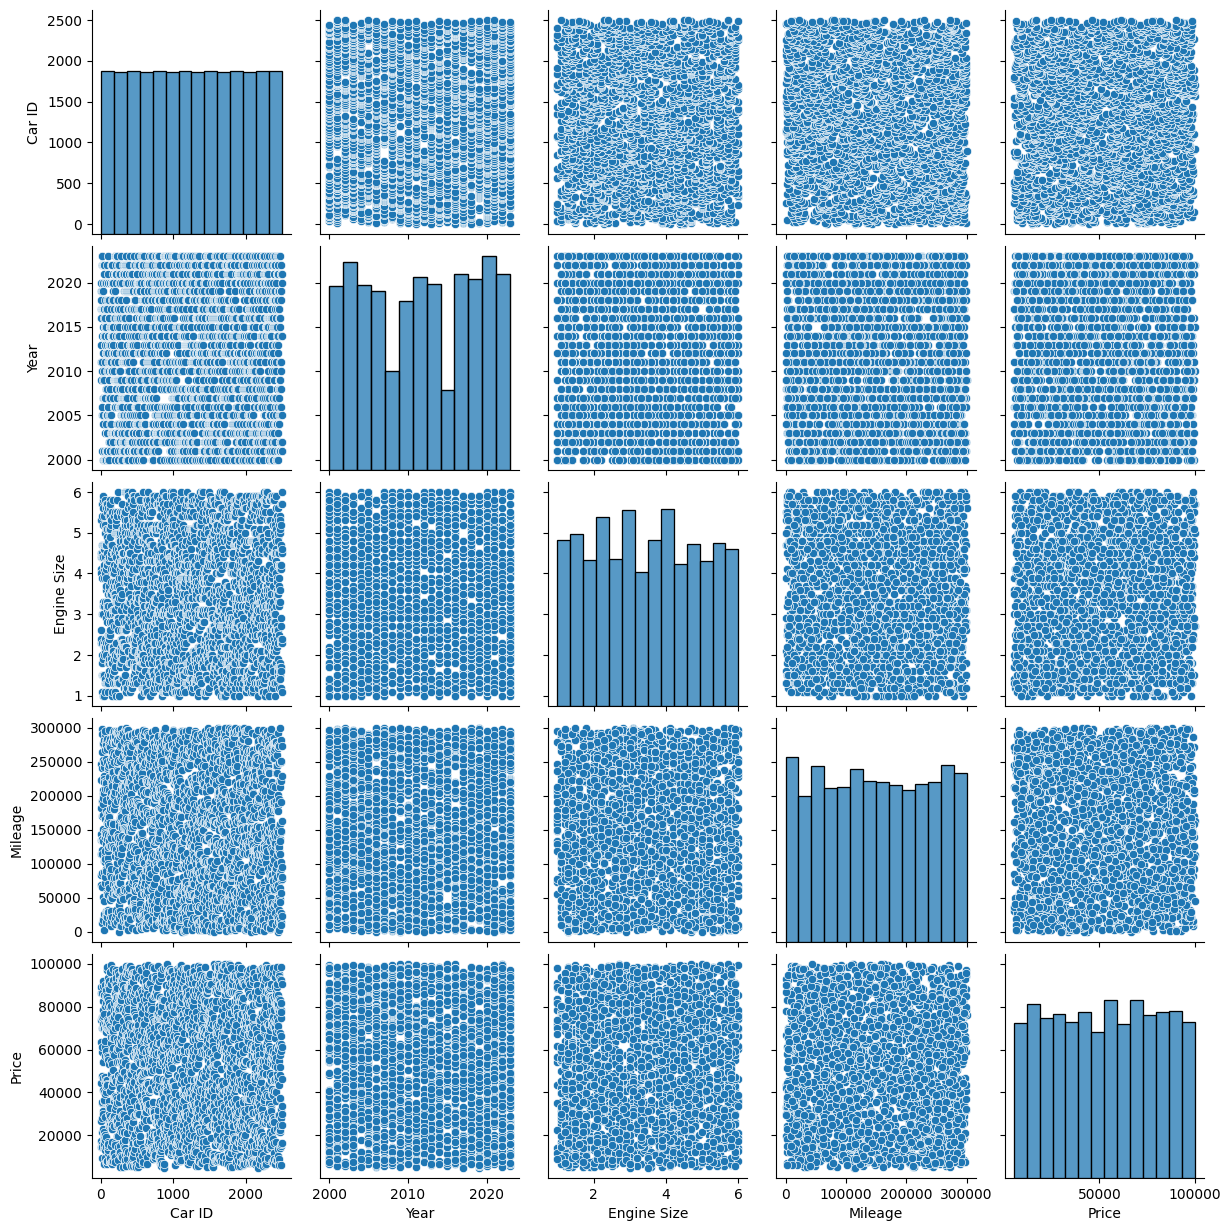

In [8]:
sns.pairplot(df)

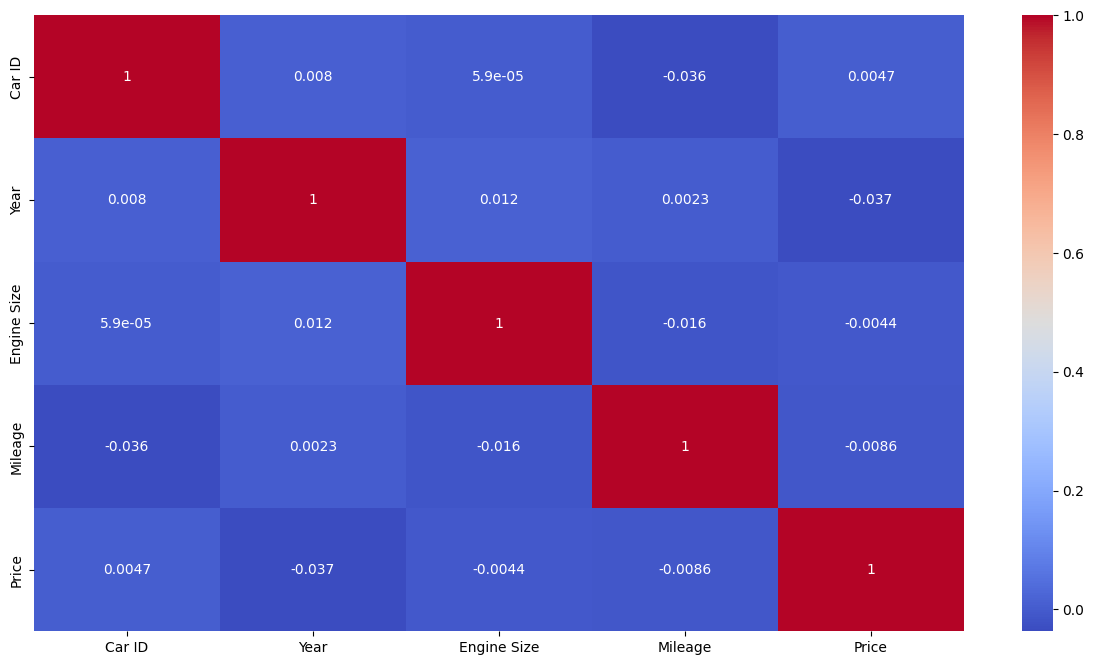

In [9]:
corr_matrix = df.select_dtypes(include=["float64", "int64"]).corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [10]:
df.columns

Index(['Car ID', 'Brand', 'Year', 'Engine Size', 'Fuel Type', 'Transmission',
       'Mileage', 'Condition', 'Price', 'Model'],
      dtype='object')

In [11]:
brands = df['Brand'].unique()
fuel_type = df['Fuel Type'].unique()
transmission = df['Transmission'].unique()
condittion = df['Condition'].unique()
model = df['Model'].unique()
print(f'Brands:', brands)
print(f'Fuel Tye:',fuel_type)
print(f'Transmission:',transmission)
print(f'Condition:',condittion)
print(f'Model:',model)

Brands: ['Tesla' 'BMW' 'Audi' 'Ford' 'Honda' 'Mercedes' 'Toyota']
Fuel Tye: ['Petrol' 'Electric' 'Diesel' 'Hybrid']
Transmission: ['Manual' 'Automatic']
Condition: ['New' 'Used' 'Like New']
Model: ['Model X' '5 Series' 'A4' 'Model Y' 'Mustang' 'Q7' 'Q5' 'Civic'
 'Explorer' 'Model 3' 'Fiesta' 'X3' 'GLA' 'A3' 'X5' 'C-Class' 'E-Class'
 'CR-V' 'Camry' 'Accord' 'GLC' 'Corolla' 'Fit' 'Model S' 'Prius'
 '3 Series' 'RAV4' 'Focus']


# Understanding the features of the dataset

* Brand and Model: How different brands and models of cars affect the price?
* Are luxury brands more expensive?
* Year of Manufacture: How does the year of manufacture affect the price?
* Are there any notable trends for specifoc brands?
* Engine Size: How does the engine size affect the price? Does a larger engine size mean a higher price? how does the engine size affect the price for different brands, fuel types? 
* Mileage: How does the mileage affect the price? Does a higher mileage mean a lower price?
* Fuel Type: How does the fuel type affect the price? Are diesel cars more expensive than petrol cars? Are electric cars priced hgher due to their tecnology, or do they vary based on other factors?
* Transmission: How does the transmission type affect the price? Are automatic cars more expensive than manual cars?

### Price

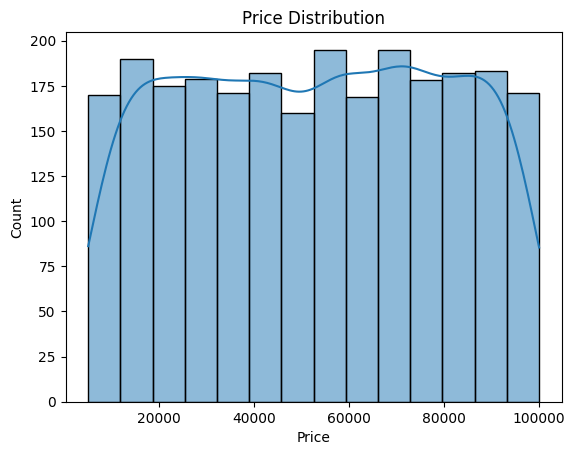

In [12]:
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

There isn't a clear pick or central tendency in the distribution. There could be a large number of outliers spread across the range of prices.So we will check for outliers in the price column.

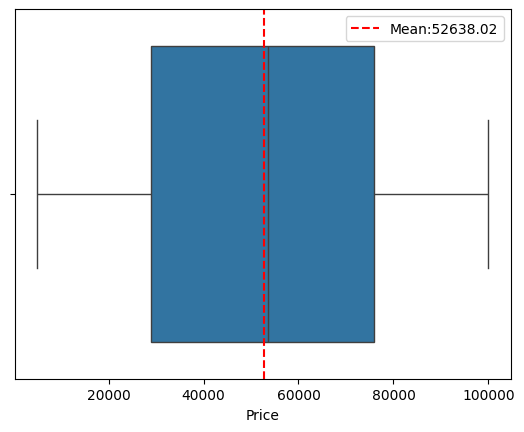

In [13]:
sns.boxplot(x=df['Price'])
mean_price = df['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean:{mean_price:.2f}')

plt.legend()
plt.show()

In [14]:
from scipy import stats

z_scores = stats.zscore(df["Price"])
abs_z_scores = abs(z_scores)
outliers = abs_z_scores > 3  # Threshold of 3
outliers_df = df[outliers]
print(outliers_df)  # This will show any outliers

Empty DataFrame
Columns: [Car ID, Brand, Year, Engine Size, Fuel Type, Transmission, Mileage, Condition, Price, Model]
Index: []


Apparantly, the price columns has no outliers.

## Brand and Model

In [15]:
brands

array(['Tesla', 'BMW', 'Audi', 'Ford', 'Honda', 'Mercedes', 'Toyota'],
      dtype=object)

  Types of Brand         Price
1            BMW  54157.114385
5          Tesla  53475.547471
4       Mercedes  53191.090085
6         Toyota  52078.728235
3          Honda  52050.283949
0           Audi  51953.424810
2           Ford  51593.254813


<BarContainer object of 7 artists>

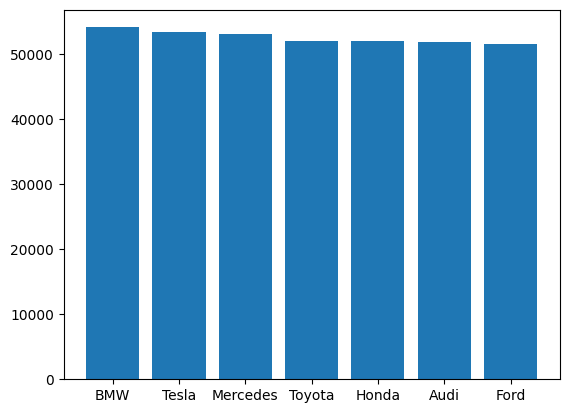

In [16]:
price_per_brand = df.groupby('Brand',observed=True)['Price'].mean().reset_index()
price_per_brand = price_per_brand.rename(columns={'Brand':'Types of Brand'})
price_per_brand = price_per_brand.sort_values(by='Price',ascending=False)

print(price_per_brand)

plt.bar(price_per_brand['Types of Brand'], price_per_brand['Price'])

BMW is the most expensive brand, followed by Tesla ans Mercedes. Ford is the cheapest brand.

In [17]:
price_by_model = (df.groupby(["Brand", "Model"], observed=True)["Price"].mean().reset_index())
price_by_model= price_by_model.sort_values(by='Price',ascending=False)

print(price_by_model)

       Brand     Model         Price
19  Mercedes       GLC  59544.773750
4        BMW  3 Series  58561.123548
24    Toyota     Camry  56405.516111
5        BMW  5 Series  55986.422796
10      Ford     Focus  55677.760000
15     Honda       Fit  55369.341236
20     Tesla   Model 3  55142.083563
23     Tesla   Model Y  54708.899101
25    Toyota   Corolla  53782.605534
2       Audi        Q5  53432.295949
16  Mercedes   C-Class  53080.840761
21     Tesla   Model S  52887.345823
12     Honda    Accord  52799.983523
3       Audi        Q7  52594.554211
8       Ford  Explorer  52117.953953
1       Audi        A4  51554.915000
17  Mercedes   E-Class  51358.704157
9       Ford    Fiesta  51313.160777
27    Toyota      RAV4  51248.733636
22     Tesla   Model X  51235.880753
6        BMW        X3  51021.077391
0       Audi        A3  50530.147551
7        BMW        X5  50517.325250
13     Honda      CR-V  50046.228316
14     Honda     Civic  49912.979250
18  Mercedes       GLA  49549.031304
1

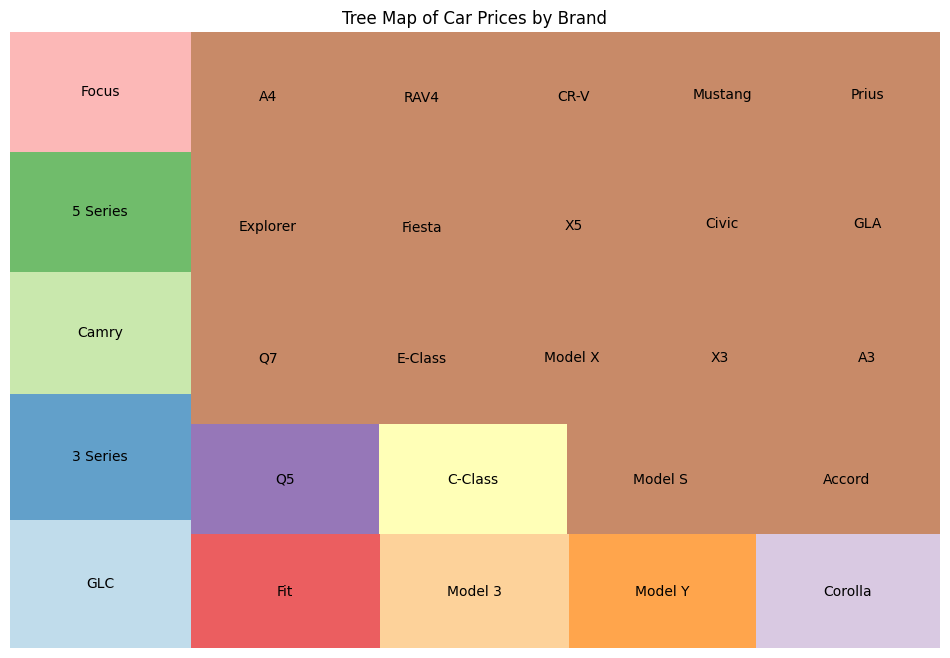

In [ ]:
import squarify

plt.figure(figsize=(12,8))
squarify.plot(sizes=price_by_model['Price'], label=price_by_model['Model'],  alpha=0.7, color=plt.cm.Paired(range(len(price_by_model))))
plt.title('Tree Map of Car Prices by Brand')
plt.axis('off')
plt.show()

BMW ranks as a top luxury brand with high price, but the cost varies by model. The Mercedes' GLC is the pricest model in the dataset, while BMW's 3 seires is priced slightly lower, illustrating how model-specific influence car pricing.

## Year of Manufacture

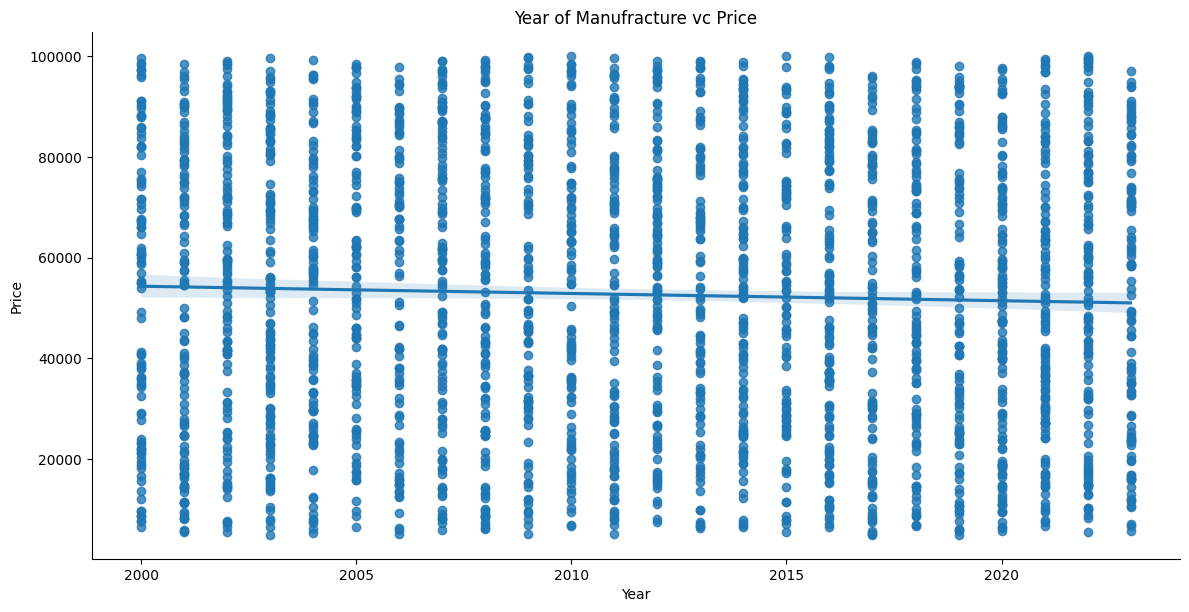

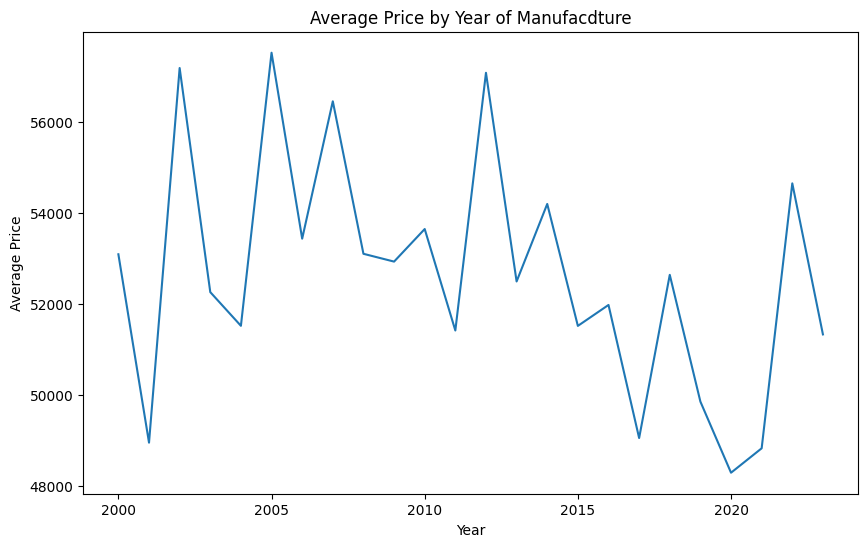

In [24]:
sns.lmplot(x='Year', y='Price', data=df, aspect=2, height=6)
plt.title("Year of Manufracture vc Price")
plt.show()

yearly_avg_price = df.groupby('Year', observed=True)['Price'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Price', data=yearly_avg_price)
plt.title('Average Price by Year of Manufacdture')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

The year of manufacture seems to affect car prices,though inconsistently. The price drop during the 2008 financial crisis might reflect economic struggles, while the rise after 2010 could be linked to recovery and demand for newer models. The dip in 2020 likely reflects the COVID-19 pandemic's impact on production.However, pther factors might also be influencing these price changes.

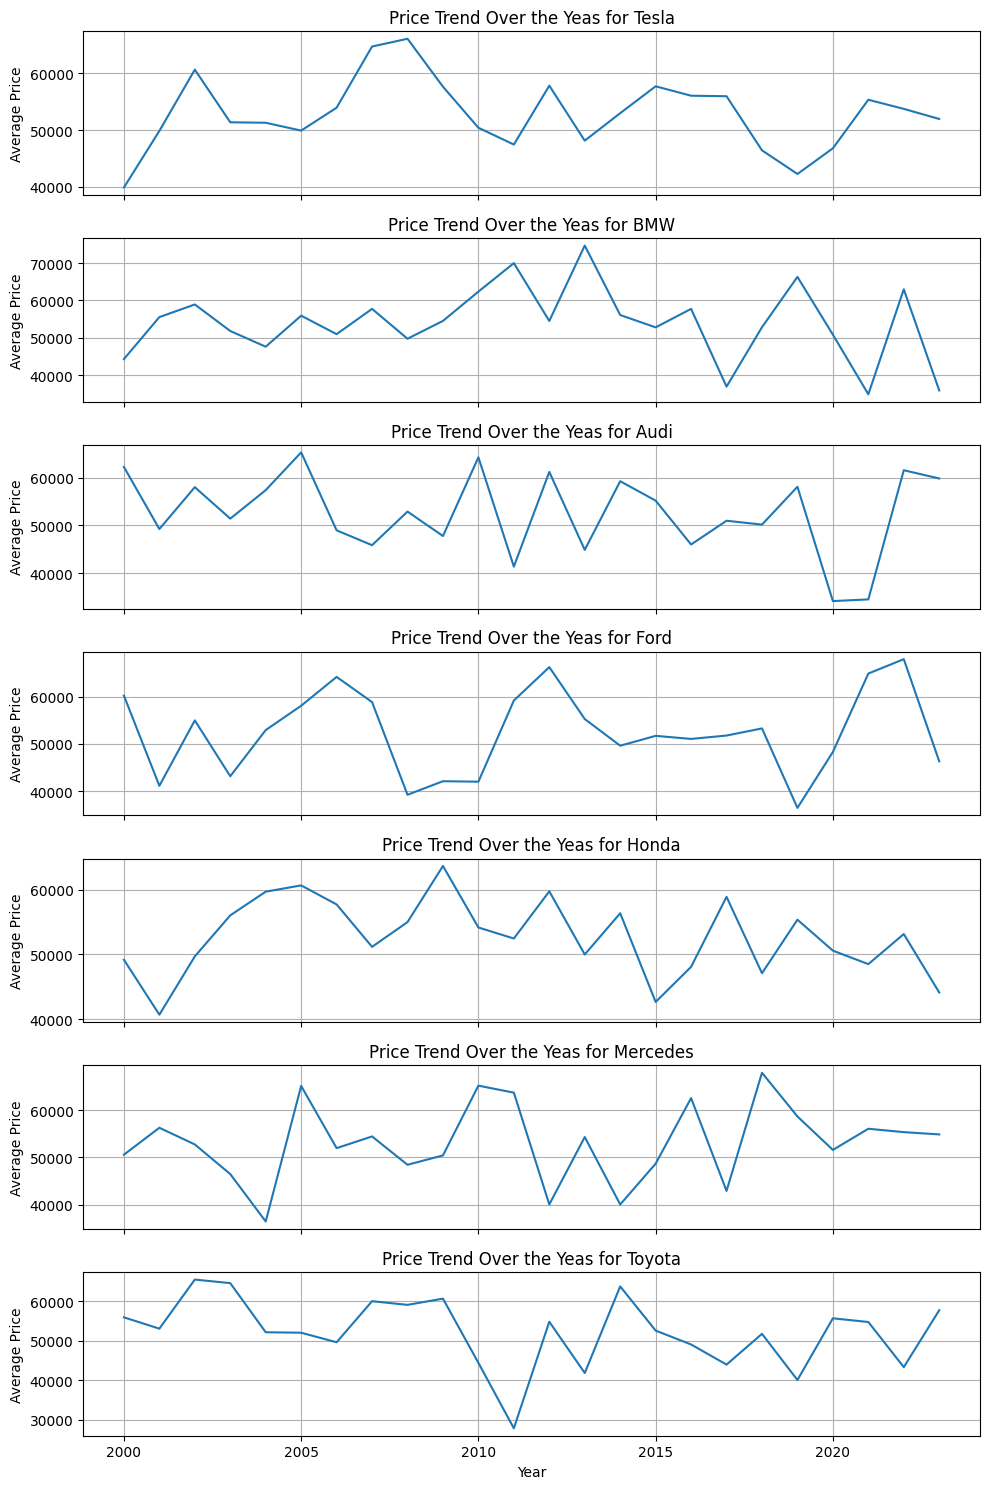

In [32]:
fig, axes = plt.subplots(len(brands), 1, figsize=(10,15), sharex=True)

for i, brand in enumerate (brands):
	brand_data = df[df['Brand']== brand]
	year_price = brand_data.groupby('Year', observed=True)['Price'].mean()
	sns.lineplot(x=year_price.index, y=year_price.values, ax=axes[i])
	axes[i].set_title(f'Price Trend Over the Yeas for {brand}')
	axes[i].set_ylabel('Average Price')
	axes[i].grid(True)

axes[-1].set_xlabel('Year')

plt.tight_layout()
plt.show()

In [53]:
df_encoded = pd.get_dummies(df, columns=['Brand', 'Fuel Type', 'Condition', 'Model','Transmission'], drop_first=False)

df_encoded.head()

,Car ID,Year,Engine Size,Mileage,Price,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,...,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5,Transmission_Automatic,Transmission_Manual
0,1,2016,2.3,114832,26613.92,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,2018,4.4,143190,14679.61,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,2013,4.5,181601,44402.61,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,2011,4.1,68682,86374.33,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,5,2009,2.6,223009,73577.10,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True


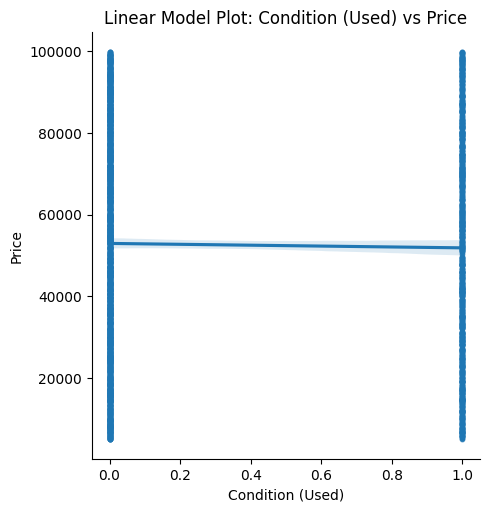

In [54]:
sns.lmplot(
    x="Condition_New",
    y="Price",
    data=df_encoded,
    logistic=False,
    scatter_kws={"s": 10},
)
plt.title("Linear Model Plot: Condition (Used) vs Price")
plt.xlabel("Condition (Used)")
plt.ylabel("Price")
plt.show()

In [39]:
df_encoded.columns

Index(['Car ID', 'Year', 'Engine Size', 'Transmission', 'Mileage', 'Price',
       'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Mercedes',
       'Brand_Tesla', 'Brand_Toyota', 'Fuel Type_Electric', 'Fuel Type_Hybrid',
       'Fuel Type_Petrol', 'Condition_New', 'Condition_Used', 'Model_5 Series',
       'Model_A3', 'Model_A4', 'Model_Accord', 'Model_C-Class', 'Model_CR-V',
       'Model_Camry', 'Model_Civic', 'Model_Corolla', 'Model_E-Class',
       'Model_Explorer', 'Model_Fiesta', 'Model_Fit', 'Model_Focus',
       'Model_GLA', 'Model_GLC', 'Model_Model 3', 'Model_Model S',
       'Model_Model X', 'Model_Model Y', 'Model_Mustang', 'Model_Prius',
       'Model_Q5', 'Model_Q7', 'Model_RAV4', 'Model_X3', 'Model_X5'],
      dtype='object')

In [54]:
#SKlearn

from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Car ID','Price'])
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
lm.coef_

array([-1.63688429e+02, -8.47175127e+01, -5.00689237e-03, -4.43562091e+01,
        1.23433604e+03, -9.89475405e+02, -1.28387773e+03, -2.50376336e+02,
        1.61844268e+03, -2.84693048e+02,  2.18021254e+03, -8.97938887e+02,
        7.08164245e+01, -1.35309008e+03,  6.51009882e+01, -3.83833849e+02,
        3.18732870e+02,  4.16272895e+03,  8.45752519e+02, -1.48938769e+03,
        1.53623294e+03,  2.84880174e+03, -9.56726172e+02, -5.44767064e+03,
        1.48894236e+02,  2.17472463e+02,  3.16645494e+03, -2.24809267e+02,
        3.01406896e+03, -4.14508036e+02,  1.09751871e+03,  5.41675970e+03,
       -6.00796016e+03,  6.93911926e+03, -1.24752030e+03,  1.11668804e+03,
       -1.17371733e+03,  2.92299227e+03, -9.00579603e+03, -2.16910614e+03,
        5.15227631e+02, -6.06429093e+02, -1.43093608e+03, -1.54831247e+03,
       -2.22583296e+03, -6.98069150e+02,  6.98069152e+02])

In [58]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
cdf

,Coef
Year,-163.688429
Engine Size,-84.717513
Mileage,-0.005007
Brand_Audi,-44.356209
Brand_BMW,1234.336043
Brand_Ford,-989.475405
Brand_Honda,-1283.877728
Brand_Mercedes,-250.376336
Brand_Tesla,1618.442681
Brand_Toyota,-284.693048
